In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/drive/Shareddrives/FareSunday - Rakamin Final Project/Stage 3/preprocessing2.csv')
df.head()

,ProdTaken,Age,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome,Chance,Designation_Executive,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Occupation_Free Lancer,Occupation_Large Business,Occupation_Salaried,Occupation_Small Business,ProductPitched_Basic,TypeofContact_Company Invited,TypeofContact_Self Enquiry,Gender_Fe Male,Gender_Female,Gender_Male,CityTier_1,CityTier_2,CityTier_3
0,1,37.0,8.0,3,4.0,3.0,7.0,1,3,0,0.0,17090.0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,1,1,0,0
1,0,33.0,9.0,2,3.0,3.0,2.0,1,5,1,1.0,17909.0,0,1,1,0,0,0,0,0,1,0,1,1,0,0,1,0,1,0,0
2,0,38.0,8.0,2,3.0,4.0,1.0,0,5,1,0.0,18468.0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,1,1,0,0
3,0,32.0,8.0,3,3.0,3.0,1.0,0,5,1,1.0,18068.0,0,1,0,0,1,0,0,0,1,0,1,1,0,0,0,1,1,0,0
4,0,59.0,9.0,2,2.0,5.0,5.0,1,2,1,1.0,17670.0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0,0


# Modelling

In [5]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc

def eval_classification(model, pred, proba, xtrain, ytrain, xtest, ytest):
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, pred))
    print("Precision (Test Set): %.2f" % precision_score(ytest, pred))
    print("Recall (Test Set): %.2f" % recall_score(ytest, pred))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, pred))
    
    fpr, tpr, thresholds = roc_curve(ytest, proba, pos_label=1) # pos_label: label yang kita anggap positive
    print("AUC: %.2f" % auc(fpr, tpr))

## Split Train and Test Data

In [7]:
# Split Feature and Label
X = df.drop(columns=['Chance'])
y = df['Chance'] # target / label

#Splitting the data into Train and Test
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier# import knn dari sklearn
knn = KNeighborsClassifier() # inisiasi object dengan nama knn
knn.fit(X_train, y_train) # fit model KNN dari data train

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)
y_proba = y_proba[:,1]
eval_classification(model, y_pred, y_proba, X_train, y_train, X_test, y_test)

NameError: ignored

# Random Forrest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)
pred = rf.predict(X_test)
eval_regression(rf, pred, X_train, y_train, X_test, y_test)

# Lasso 

In [ ]:
from sklearn.linear_model import Lasso
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)

pred = lasso_model.predict(X_test)
eval_regression(lasso_model, pred, X_train, y_train, X_test, y_test)

# Ridge

In [ ]:
from sklearn.linear_model import Lasso
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)

pred = lasso_model.predict(X_test)
eval_regression(lasso_model, pred, X_train, y_train, X_test, y_test)

# Elastic Net

In [ ]:
from sklearn.linear_model import ElasticNet

elasticnet_model = ElasticNet()
elasticnet_model.fit(X_train, y_train)

pred = elasticnet_model.predict(X_test)
eval_regression(elasticnet_model, pred, X_train, y_train, X_test, y_test)

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)
y_proba = y_proba[:,1]
eval_classification(model, y_pred, y_proba, X_train, y_train, X_test, y_test)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

Accuracy (Test Set): 1.00
Precision (Test Set): 1.00
Recall (Test Set): 1.00
F1-Score (Test Set): 1.00
AUC: 1.00


In [ ]:
print('Train score: ' + str(model.score(X_train, y_train))) #accuracy
print('Test score:' + str(model.score(X_test, y_test))) #accuracy

Train score: 1.0
Test score:1.0


# Decision Tree

In [8]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def eval_regression(model, pred, xtrain, ytrain, xtest, ytest):
    print("MAE: %.2f" % mean_absolute_error(ytest, pred)) # The MAE
    print("RMSE: %.2f" % mean_squared_error(ytest, pred, squared=False)) # The RMSE
    print('R2 score: %.2f' % r2_score(ytest, pred)) # Explained variance score: 1 is perfect prediction
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
pred = dt.predict(X_test)
eval_regression(dt, pred, X_train, y_train, X_test, y_test)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

MAE: 0.00
RMSE: 0.00
R2 score: 1.00


## Decision Tree

In [9]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)
y_proba = y_proba[:,1]
eval_classification(model, y_pred, y_proba, X_train, y_train, X_test, y_test)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

Accuracy (Test Set): 1.00
Precision (Test Set): 1.00
Recall (Test Set): 1.00
F1-Score (Test Set): 1.00
AUC: 1.00


In [10]:
print('Train score: ' + str(model.score(X_train, y_train))) #accuracy
print('Test score:' + str(model.score(X_test, y_test))) #accuracy

Train score: 1.0
Test score:1.0


## Hyperparameter Tunning

In [30]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 60, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features
                      )

# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=42)
model = RandomizedSearchCV(dt, hyperparameters, cv=5, random_state=42, scoring='recall')
model.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=42,
            

In [31]:
# Predict & Evaluation
y_pred = model.predict(X_test)#Check performa dari model
y_proba = model.predict_proba(X_test)
y_proba = y_proba[:,1]
eval_classification(model, y_pred, y_proba, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.96
Precision (Test Set): 0.73
Recall (Test Set): 0.76
F1-Score (Test Set): 0.75
AUC: 0.93


In [13]:
print('Best max_depth:', model.best_estimator_.get_params()['max_depth'])
print('Best min_samples_split:', model.best_estimator_.get_params()['min_samples_split'])
print('Best min_samples_leaf:', model.best_estimator_.get_params()['min_samples_leaf'])
print('Best max_features:', model.best_estimator_.get_params()['max_features'])

Best max_depth: 47
Best min_samples_split: 10
Best min_samples_leaf: 1
Best max_features: sqrt


In [14]:
print('Train score: ' + str(model.score(X_train, y_train)))
print('Test score:' + str(model.score(X_test, y_test)))

Train score: 0.9215686274509803
Test score:0.7307692307692307


In [15]:
model.best_estimator_.feature_importances_

array([0.01507313, 0.16208953, 0.04900927, 0.        , 0.02785931,
       0.52265958, 0.        , 0.        , 0.01062591, 0.        ,
       0.00130121, 0.05046581, 0.        , 0.00929468, 0.00436281,
       0.00818972, 0.        , 0.        , 0.04430686, 0.0049302 ,
       0.00269209, 0.        , 0.00696835, 0.        , 0.        ,
       0.        , 0.02123191, 0.05648416, 0.        , 0.00245547])

Text(0.5, 0, 'score')

Text(0, 0.5, 'feature')

Text(0.5, 1.0, 'feature importance score')

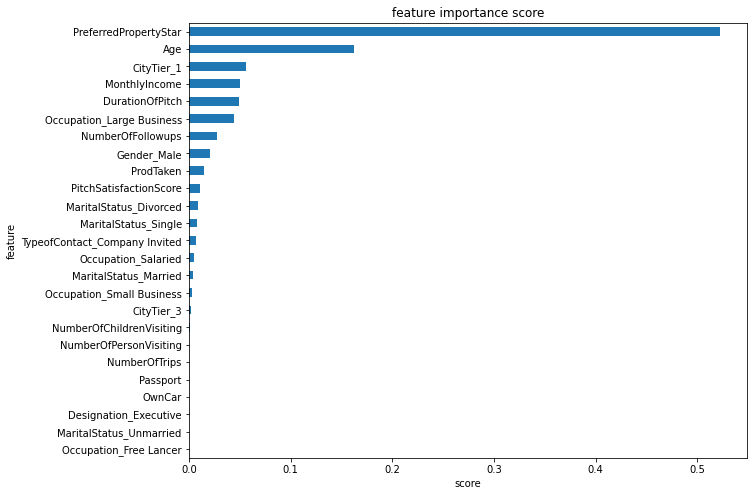

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# plt.figsize(10, 8)
feat_importances = pd.Series(model.best_estimator_.feature_importances_, index=X.columns)
ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
ax.invert_yaxis()

plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')

6 top feature only
# New Section

In [36]:
# Split Feature and Label
X2 = df[['PreferredPropertyStar', 'Age', 'CityTier_1', 'MonthlyIncome', 'DurationOfPitch', 
         'Occupation_Large Business', 'NumberOfFollowups',  'Gender_Male', 'ProdTaken', 'PitchSatisfactionScore',
  #       'MaritalStatus_Divorced', 'MaritalStatus_Single', 'TypeofContact_Company Invited',  'Occupation_Salaried',
  #       'MaritalStatus_Married', 'Occupation_Small Business', 'CityTier_3'
         ]]
y2 = df['Chance'] # target / label

#Splitting the data into Train and Test
from sklearn.model_selection import train_test_split 
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.2, random_state = 42)

In [37]:
# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 60, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features
                      )

# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=42)
model = RandomizedSearchCV(dt, hyperparameters, cv=5, random_state=42, scoring='precision')
model.fit(X_train2, y_train2)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined a

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=42,
            

In [38]:
# Predict & Evaluation
y_pred2 = model.predict(X_test2)#Check performa dari model
y_proba2 = model.predict_proba(X_test2)
y_proba2 = y_proba2[:,1]
eval_classification(model, y_pred2, y_proba2, X_train2, y_train2, X_test2, y_test2)

Accuracy (Test Set): 0.93
Precision (Test Set): 1.00
Recall (Test Set): 0.16
F1-Score (Test Set): 0.28
AUC: 0.94


# Stacking

In [21]:
from sklearn.metrics import accuracy_score, recall_score
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier


def algorithm_pipeline(X_train_data, X_test_data, y_train_data, y_test_data, model, hyperparameters, cv=5, scoring_fit='recall', scoring_test=recall_score):
    rs = RandomizedSearchCV(estimator=model, param_distributions=hyperparameters, cv=cv, n_jobs=-1, scoring=scoring_fit, verbose=0, random_state=42) # Use GridSearch better if you have more resource & time
    rs.fit(X_train_data, y_train_data)
    best_model = rs.best_estimator_
    
    pred = rs.predict(X_test_data)
    score = scoring_test(y_test_data, pred)
    return [best_model, pred, score]

In [22]:
models_to_train = [LogisticRegression(), KNeighborsClassifier(), DecisionTreeClassifier(), RandomForestClassifier(), AdaBoostClassifier(random_state=42), XGBClassifier(random_state=42)]

# Defining the hyperparameters to optimize
grid_parameters = [
    { # Logistic Regression
        'penalty': ['l2','l1','elasticnet'],
        'C': np.logspace(-4,4,20)
    },
    { # KNearestNeighbor
        'leaf_size': list(range(1,50)),
        'n_neighbors': list(range(1,30)),
        'p': [1,2],
        'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
    }, 
    { # Decision Tree
        'max_depth': np.linspace(1, 32, 32, endpoint=True),
        'min_samples_split': np.linspace(0.1, 1.0, 10, endpoint=True),
        'min_samples_leaf': np.linspace(0.1, 0.5, 5, endpoint=True),
        'max_features': list(range(1,X_train.shape[1]))
    }, 
    { # Random Forest
        'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)],
        'max_features': ['auto', 'sqrt', 'log2'],
        'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
        'criterion': ['gini','entropy'],
        'min_samples_split': [int(x) for x in np.linspace(start = 2, stop = 10, num = 5)],
        'min_samples_leaf': [int(x) for x in np.linspace(start = 1, stop = 10, num = 5)],
        'bootstrap': [True],
        'n_jobs': [-1]
    },
    { # Adaboost
       'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)],
       'learning_rate': [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 20)],
       'algorithm': ['SAMME', 'SAMME.R']
    },
    { # XGBoost
        'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
        'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
        'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
        'tree_method' : ['auto', 'exact', 'approx', 'hist'],

        'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
        'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

        'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
        'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
    }
]

In [23]:
models_preds_scores = []

for i, model in enumerate(models_to_train):
    hyperparameters = grid_parameters[i]
    result = algorithm_pipeline(X_train, X_test, y_train, y_test,  model, hyperparameters, cv=5)
    models_preds_scores.append(result)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [24]:
for result in models_preds_scores:
    print('Model: {0}, Score: {1}'.format(type(result[0]).__name__, result[2])) # score in training data

Model: LogisticRegression, Score: 0.8
Model: KNeighborsClassifier, Score: 0.52
Model: DecisionTreeClassifier, Score: 0.0
Model: RandomForestClassifier, Score: 0.84
Model: AdaBoostClassifier, Score: 0.96
Model: XGBClassifier, Score: 1.0


In [ ]:
# define level-1 algorithm
level1 = list()
level1.append(('lr', LogisticRegression(C=4.281332398719396)))
level1.append(('knn', KNeighborsClassifier(algorithm='brute', leaf_size=48, n_neighbors=17, p=1)))
level1.append(('dt', DecisionTreeClassifier(max_depth=31.0, max_features=25, min_samples_leaf=0.4, min_samples_split=0.30000000000000004)))
level1.append(('rf', RandomForestClassifier(max_depth=110, max_features='sqrt', min_samples_leaf=5, min_samples_split=10, n_estimators=1600, n_jobs=-1)))
level1.append(('ab', AdaBoostClassifier(learning_rate=0.05831578947368421, n_estimators=200, random_state=42)))

# define level-2 algorithm
level2 = XGBClassifier(alpha=0.30000000000000004, base_score=0.5, booster='gbtree',
                colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.1,
                eta=0.13131313131313133, gamma=0.4, gpu_id=-1,
                importance_type='gain',
                learning_rate=0.13131313, max_delta_step=0, max_depth=90,
                min_child_weight=6, monotone_constraints='()',
                n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=42,
                reg_alpha=0.300000012, reg_lambda=0, scale_pos_weight=1,
                subsample=1, tree_method='hist', validate_parameters=1,
                verbosity=None)

# Fit model
stacking_model = StackingClassifier(estimators=level1, final_estimator=level2, cv=5)
stacking_model.fit(X_train,y_train)
y_pred = stacking_model.predict(X_test)#Check performa dari model
eval_classification(stacking_model, y_pred, X_train, y_train, X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


XGBoostError: ignored